<a href="https://colab.research.google.com/github/anaaparamesh/Week2_Public/blob/master/Notebooks/01_TimeSeries/TimeSeries_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Data Analysis
Let's revist the dataset utilized in the tutorial

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io.wavfile
from IPython.display import Audio

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

Import the data and see what's in it (print the first 7 rows):

In [68]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/multiTimeline.csv"
df = pd.read_csv(url,  skiprows=1)

#Write Code Here
df.head(7)

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
5,2004-06,64,24,45
6,2004-07,60,23,44


What are your data types and how many rows do you have?:
the data types are numeric and how much it has been searched in google over the years. I have 168 rows. 
---



In [69]:
#Write Code Here
x = df.shape
print("The number of rows are : " + str(x[0]))
print("The numeric data types are : " + str(x[1]))

The number of rows are : 168
The numeric data types are : 4


Change the dataframe index to be datetime type. Plot all columns the dataset:


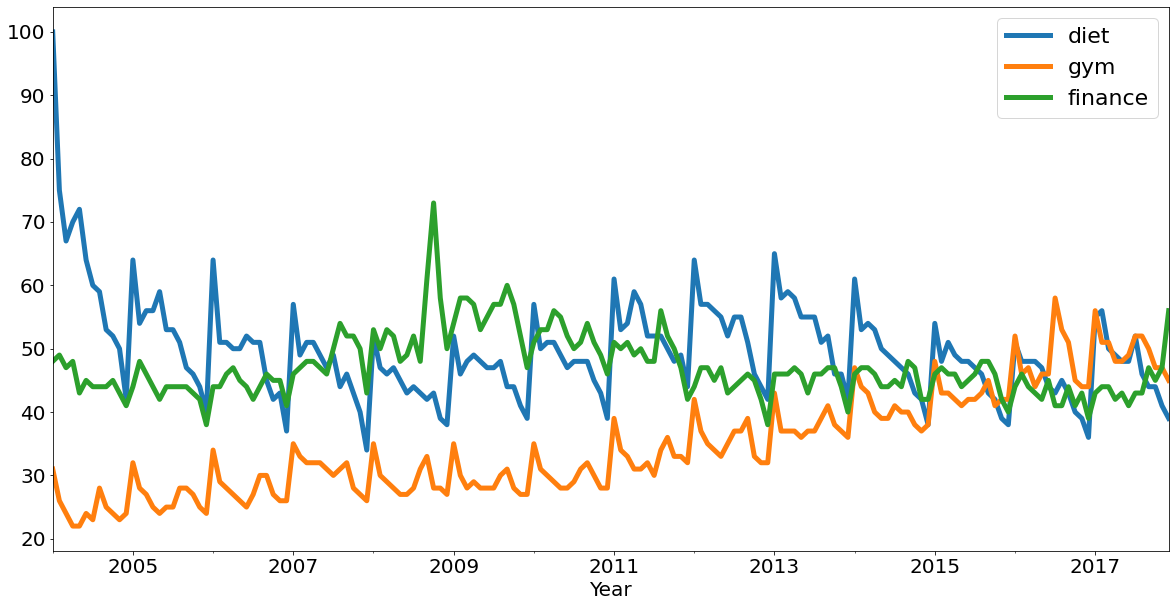

In [70]:
#Write Code Here

#make to_datetime
df['month'] = pd.to_datetime(df['month'], errors='coerce')

#sets date as index.
df.set_index('month', inplace=True)

#shows the new version of df
df.head()

#pandas has built-in visualization method, where you can graph with just df.
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Now let's plot the 'gym' and 'finance' columns as a time series.

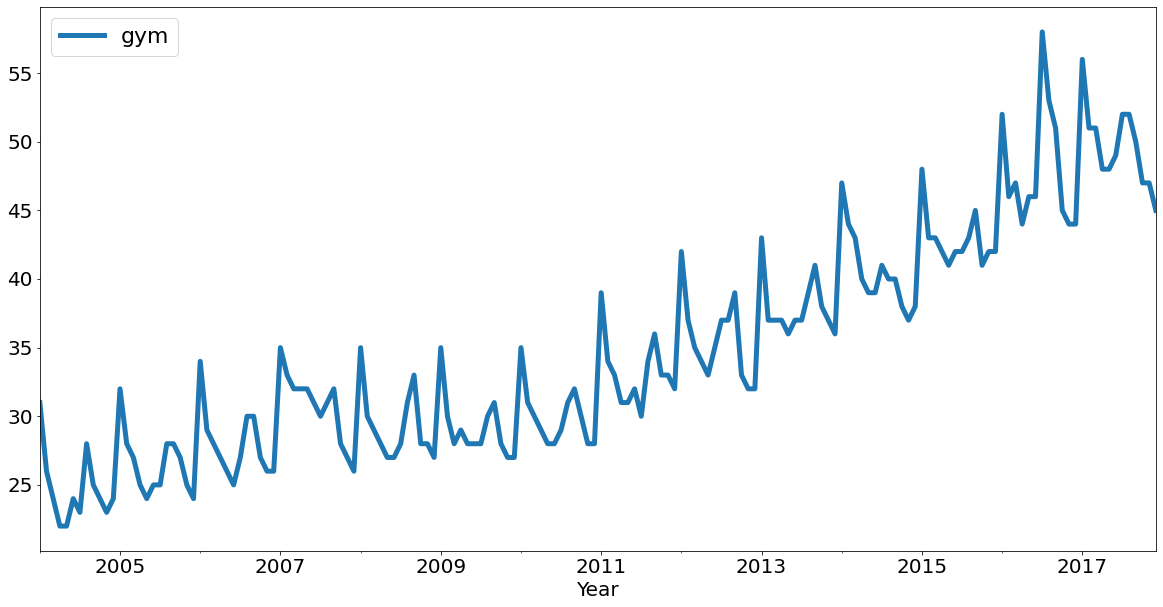

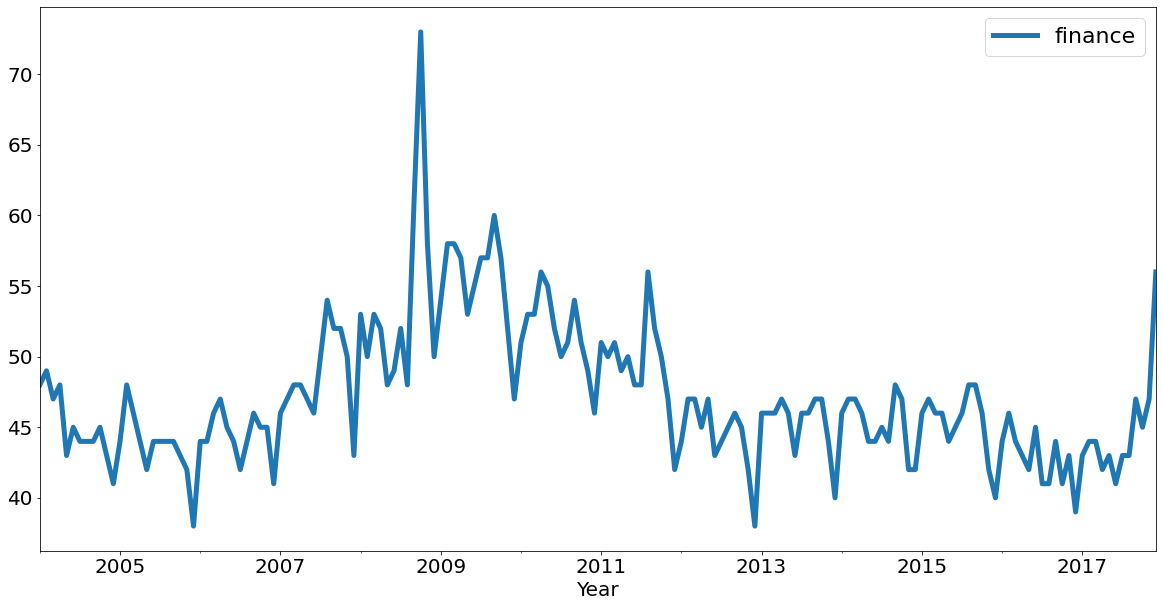

In [71]:
#write code here

#plot gym as a time series itself
df[['gym']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

#plot finance as a time series itself
df[['finance']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Using a rolling window of appropriate size, identfy non-seasonal trends in each time series

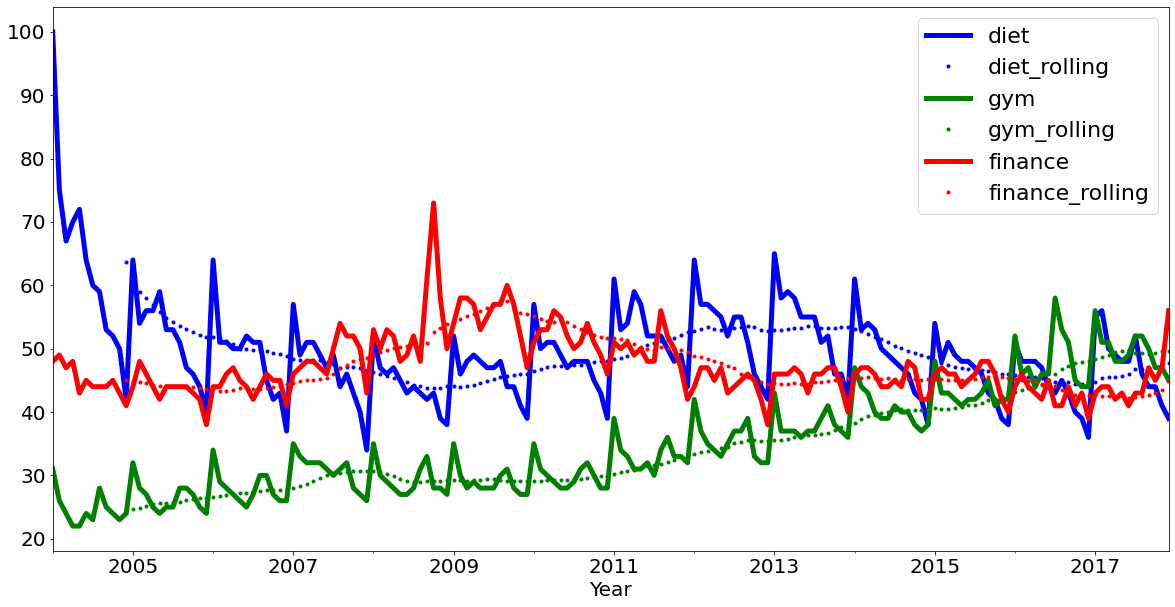

In [74]:
#write code here
#Non-seasonal trends are long-term trends, which could be found using the rolling mean, which is like finding average of continuous graph,
#for each time point, we take the average of the points on either side of it (the number of points is specified by a window size, which you need to choose).
#This case 12 months in a year, so taking average for year.
#It seems like the window is also 12 for the rolling average for both "gym" and "finance"
diet = df[['diet']]
gym = df[['gym']]
finance = df[['finance']]
window = 12


df_rm = pd.concat([diet, diet.rolling(window).mean(), gym, gym.rolling(window).mean(), finance, finance.rolling(window).mean()], axis=1)
ax = df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20, style= ['b', 'b.', 'g', 'g.', 'r', 'r.'])
ax.legend(['diet', 'diet_rolling', 'gym', 'gym_rolling', 'finance', 'finance_rolling'])
plt.xlabel('Year', fontsize=20);

Using either the first order differencing or the additive model, identify seasonal patterns in the data.

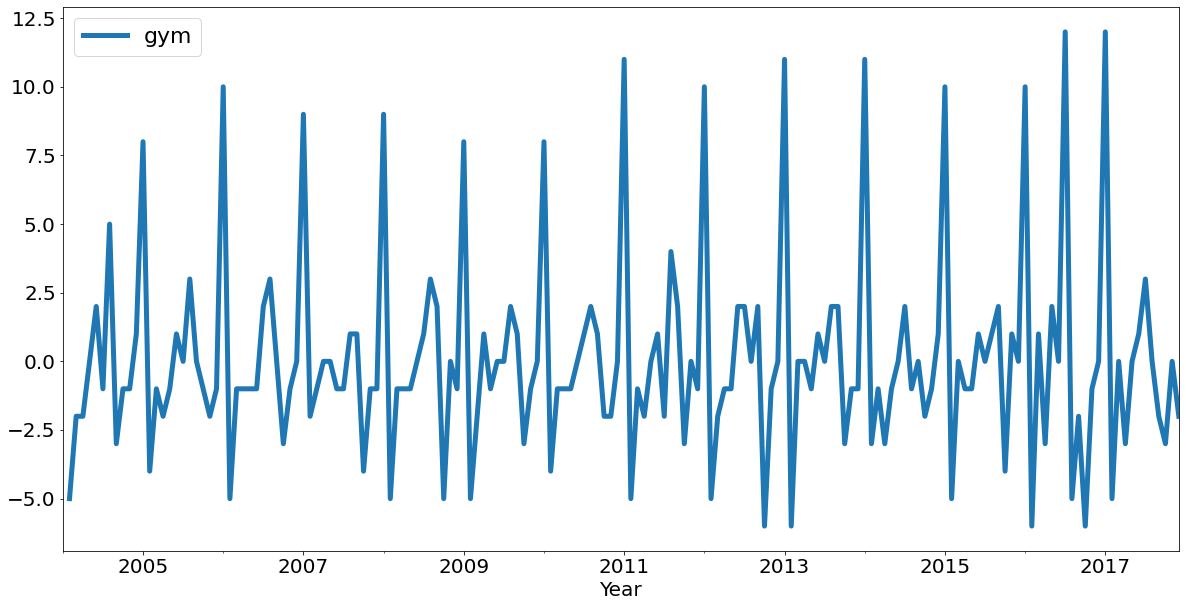

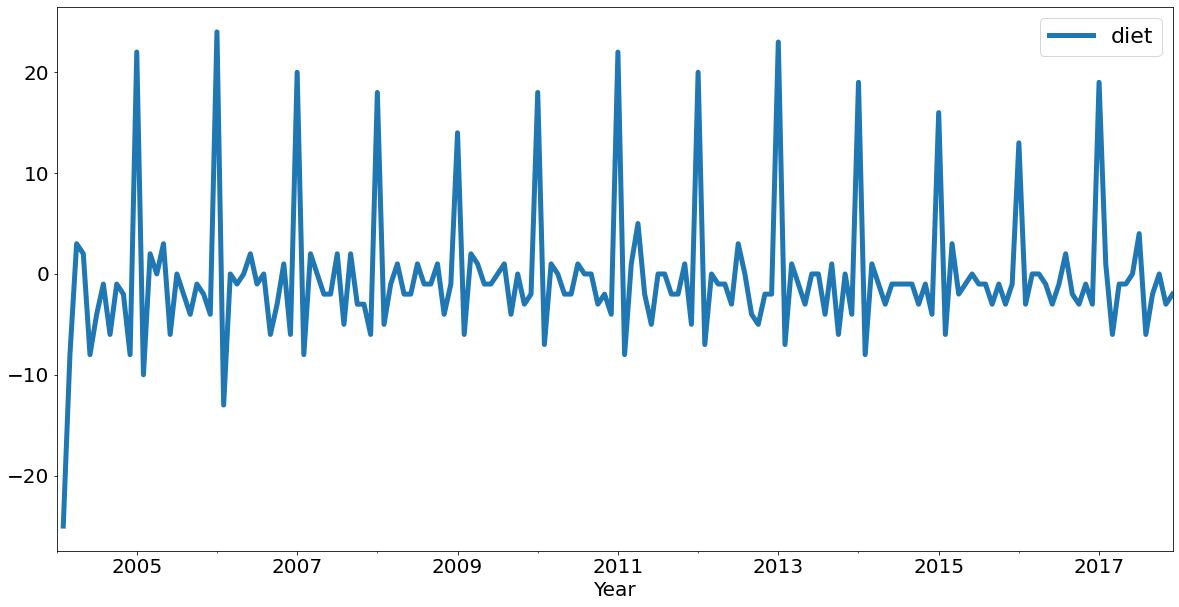

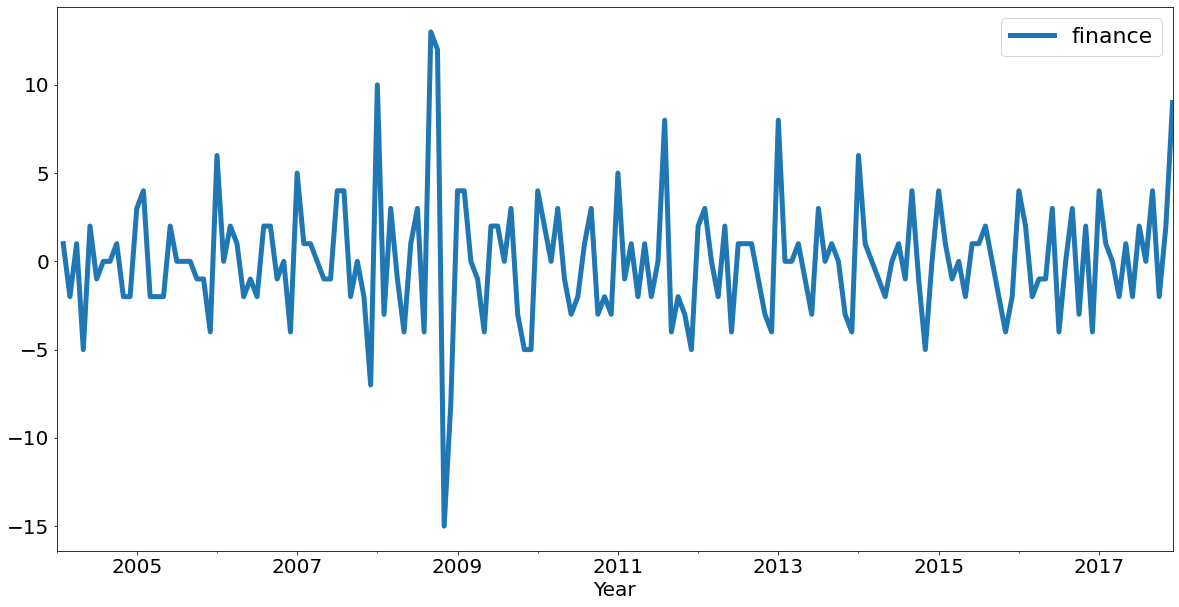

In [80]:
#write code here
#seasonal pattern are temporary points, found by looking at difference of successive points. 
gym.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

finance.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);


# Representing Signals Data

What is the formula for this sinusoidal curve? 



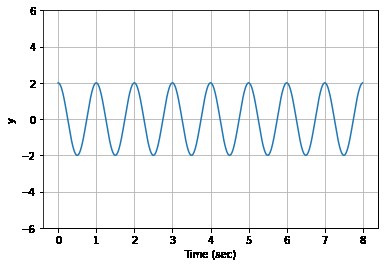

Can you reproduce the curve plot? (use np.sin, np.cos, and np.pi)

(-6.0, 6.0)

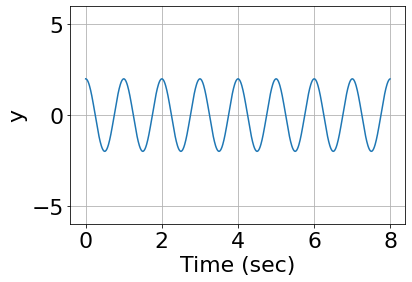

In [84]:
n_sec = 8                        # number of seconds to plot
n_points = 100                  # number of points per second
t = np.arange(n_sec*n_points)/n_points    # time axis
a = 2                           # amplitude
f = 1                           # one oscillation per second
omega = 2*np.pi*f                 # angular frequency
phi = 0                             # phase

#The equation.
y = a*np.cos(omega*t + phi)       # sinusoid

# PLOT
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()
plt.ylim([-6,6])
#Write Code Here


### Approximating a Square Wave

As you've seen, we can create arbitrary signals by combining multiple sinusoid waves.  Let's practice approximating a square wave!

Using Fourier expansion, an ideal square wave with an amplitude of 1 can be represented as an infinite sum of sinusoidal waves:

&emsp;&emsp;$y ( t ) = \frac{4}{\pi} \sum_{k=1}^\infty \frac{sin ⁡ ( 2 \pi ( 2 k − 1 ) f t )}{ 2 k − 1} = \frac{4}{ \pi} ( sin ⁡ ( 2 \pi f t ) + \frac{1}{3} sin ⁡ ( 6 \pi f t ) + \frac{1}{5} sin ⁡ ( 10 \pi f t ) + ⋯ )$

In the below code cell, try use the provided formula for the $k$th term in the expansion to calculate 5 and 20 term approximations for the square wave.

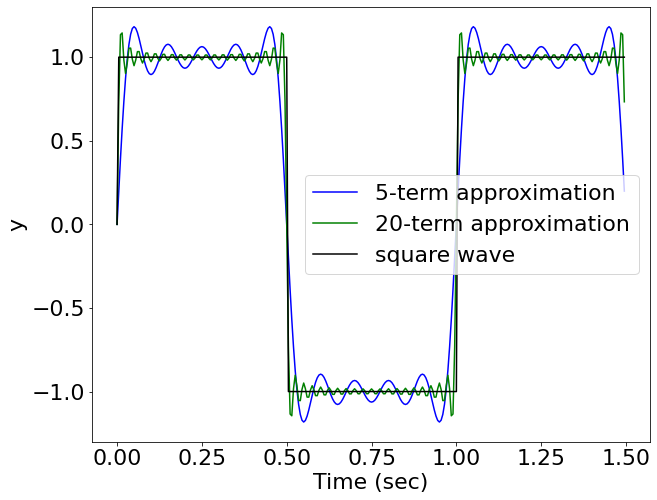

In [86]:
#Write Code Here
# Setup
n_sec = 1.5                               # number of seconds to plot
n_points_per_sec = 200                    # number of points per second
t = np.arange(n_sec*n_points_per_sec)/n_points_per_sec    # time vector
f = 1             # define frequency for square wave to be approximated
n_signals = 5     # number of terms for first approximation
n_signals2 = 20   # number of terms for second approximation
a = 1  #amplitude

# Populate y_approx1 and y_approx2 with approximations for square wave function

#creates empty array the size of the time vector.
y_approx1= np.zeros(t.shape)

#for 5 term approximations, the formula above is used.
for k in range(1,6):
  #the angle
  omega = 2*np.pi*(2*k-1)*f

  #summation from above
  y_approx1 += (np.sin(omega*t))/ (2*k-1)

#y_approx1 is the square wave for 5 term approximations.
y_approx1 = y_approx1 * (4 / np.pi)

#creates empty array the size of the time vector.
y_approx2 = np.zeros(t.shape)

#for 20 term approximations, the formula above is used.
for k in range(1,20+1):
  #the angle
  omega = 2*np.pi*(2*k-1)*f

  #summation from above
  y_approx2 += (np.sin(omega*t))/ (2*k-1)

#y_approx1 is the square wave for 5 term approximations.
y_approx2 = y_approx2 * (4 / np.pi)


# Plotting(approximations plotted)
sqwave = np.sign(np.sin(2*np.pi*t)) # an actual square wave (for reference)

plt.figure(figsize=(10,8))
plt.plot(t, y_approx1, label = f'{n_signals}-term approximation', color = 'b')
plt.plot(t, y_approx2, label = f'{n_signals2}-term approximation', color = 'g')
plt.plot(t,sqwave,label='square wave',color = 'k')

plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.legend()

Those little peaks near the corners are caused by what's known as the [Gibbs Phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon). As long as we have a finite number of terms, no matter how many, we will have Gibbs phenomena.

# Fun With Sounds

The rest of this problem set notebook is purely for fun (i.e. no more questions.) 

Below, we use scipy tools to play sounds based on waveforms we define, or to display waveforms based on recorded audio files.

### Beats
If you combine two signals with very similar frequencies, you may induce *beats*.

<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/blob/master/Images/Week2/beats.gif?raw=true">



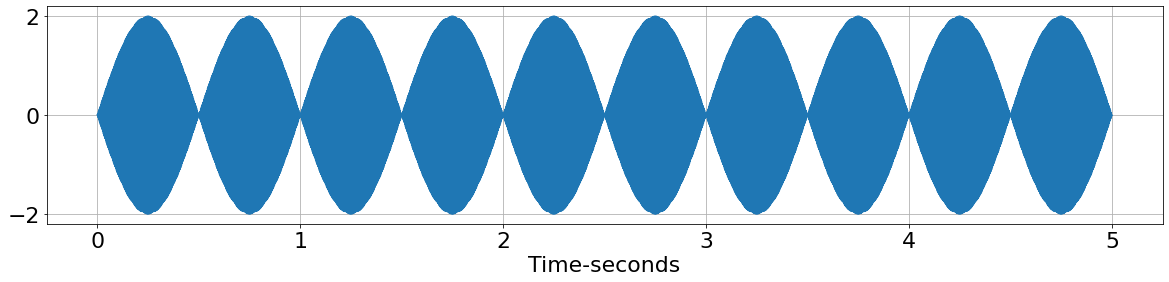

In [87]:
f = 262                # base frequency (Hz)
f_diff = 2             # frequency difference (Hz)


n_sec = 5              # number of seconds
omega1 = 2*np.pi*f     # angular frequency (rad/sec)
omega2 = 2*np.pi*(f+f_diff)    

n_points = (f+f_diff)*n_sec*4   # number of points -- must be greater than (f+f_diff)*n_sec*2
t = np.arange(n_sec*n_points)/n_points    
y = np.sin(omega1*t) + np.sin(omega2*t+np.pi)  

plt.figure(figsize=(20,4))
plt.plot(t,y)
plt.xlabel('Time-seconds')
plt.grid(True)
Audio(data=y, rate=n_points)

#### Exercise

Let's play with more sounds.  Here is what "ah" sound looks like:

In [88]:
# Grab 2 sample .wav files (audio files) to analyze
! wget https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/newt.wav
! wget https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/vowel_ah.wav


--2020-07-13 19:58:17--  https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/newt.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99852 (98K) [audio/wav]
Saving to: ‘newt.wav’

newt.wav            100%[===================>]  97.51K  --.-KB/s    in 0.04s   

2020-07-13 19:58:17 (2.61 MB/s) - ‘newt.wav’ saved [99852/99852]

--2020-07-13 19:58:18--  https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/vowel_ah.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent

Text(0, 0.5, 'amplitude')

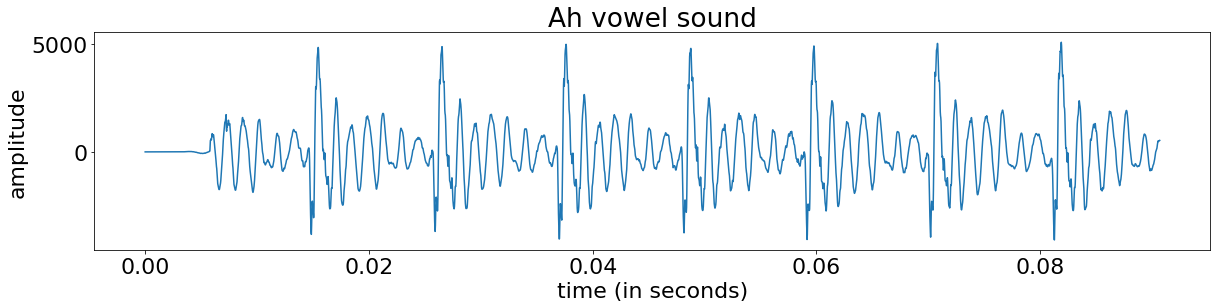

In [89]:
(sample_rate, input_signal) = scipy.io.wavfile.read("./vowel_ah.wav")

t = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

plt.figure(figsize=(20,4))
plt.plot(t[0:4000], input_signal[0:4000])
plt.title('Ah vowel sound')
plt.xlabel('time (in seconds)')
plt.ylabel('amplitude')

Now let's play the sound!

In [90]:
# for reference, this is what it should sound like
Audio("./vowel_ah.wav")

Now It's your turn: input the audio file "./newt.wav", plot the figure appropriate to the length of the input signal and sample rate, and play it.

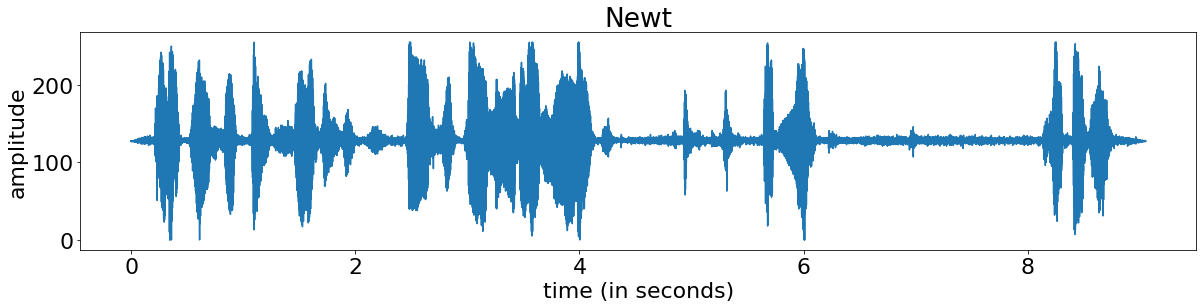

In [91]:
#write code here
(sample_rate, input_signal) = scipy.io.wavfile.read("./newt.wav")

t = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

plt.figure(figsize=(20,4))
plt.plot(t, input_signal)
plt.title('Newt')
plt.xlabel('time (in seconds)')
plt.ylabel('amplitude')

Audio(data=input_signal, rate=sample_rate)